In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned-3.csv', header='infer')

df.shape

(3977, 2)

In [3]:
df = df.dropna(how='any').copy()

In [4]:
df.shape

(3910, 2)

In [5]:
df.head()

,Time,domain
0,2021-02-19 13:35:07,web.whatsapp.com
1,2021-02-19 13:31:06,www.skullcandy.com
2,2021-02-19 00:39:45,www.amazon.com
3,2021-02-19 00:39:45,amazon.com
4,2021-02-18 19:46:34,my.umbc.edu


In [6]:
df.tail()

,Time,domain
3972,2021-01-01 03:54:34,my3.my.umbc.edu
3973,2020-12-29 10:00:13,amazon.com
3974,2020-12-14 16:48:14,www.pantaloons.com
3975,2020-12-06 04:04:24,onlinecourses.nptel.ac.in
3976,2020-12-03 09:40:39,outlook.office.com


In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

In [11]:
df['domain'].value_counts()[:50]

blackboard.umbc.edu                 583
webauth.umbc.edu                    417
www.google.com                      374
mail.google.com                     220
accounts.google.com                 148
www.amazon.com                      134
www.youtube.com                     131
umbc-csm.symplicity.com             124
my.umbc.edu                         108
localhost:8888                      101
my3.my.umbc.edu                      62
www.southwest.com                    53
www.tesla.com                        48
localhost:8889                       42
umbc.webex.com                       40
accounts.youtube.com                 39
us.bbcollab.com                      37
umbcstudents-md.safecolleges.com     36
github.com                           36
csprd-web.ps.umbc.edu                31
copyleaks.com                        31
vimeo.com                            28
www.linkedin.com                     26
lucid.app                            26
www.walmart.com                      25


<AxesSubplot:>

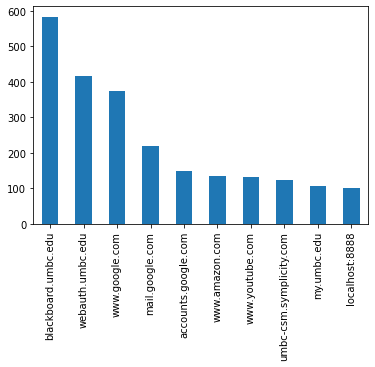

In [12]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [13]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      57
1      15
2       1
3       3
4       2
5      12
6       2
7      64
8     155
9     244
10    433
11    292
12    334
13    139
14    229
15    170
16    172
17     96
18    400
19    511
20    335
21    119
22     87
23     38
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

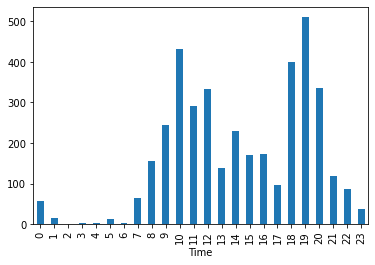

In [14]:
hourly_counts.plot.bar()

In [15]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-02-19 13:35:07,web.whatsapp.com,Friday,4
1,2021-02-19 13:31:06,www.skullcandy.com,Friday,4
2,2021-02-19 00:39:45,www.amazon.com,Friday,4
3,2021-02-19 00:39:45,amazon.com,Friday,4
4,2021-02-18 19:46:34,my.umbc.edu,Thursday,3


In [16]:
df['Day'].value_counts()

Sunday       810
Monday       645
Wednesday    633
Tuesday      479
Friday       459
Saturday     447
Thursday     437
Name: Day, dtype: int64

In [17]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    645
1    479
2    633
3    437
4    459
5    447
6    810
Name: DayIndex, dtype: int64

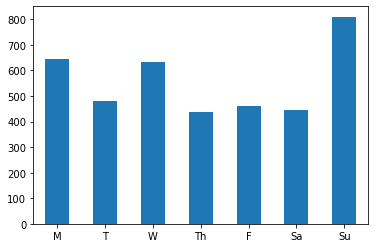

In [18]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa','Su'], rotation=0)

plt.show()

In [19]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-02-19 13:35:07,web.whatsapp.com,Friday,4,False
1,2021-02-19 13:31:06,www.skullcandy.com,Friday,4,False
2,2021-02-19 00:39:45,www.amazon.com,Friday,4,False
3,2021-02-19 00:39:45,amazon.com,Friday,4,False
4,2021-02-18 19:46:34,my.umbc.edu,Thursday,3,False


In [20]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [21]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
382,2021-02-14 23:22:35,blackboard.umbc.edu,Sunday,6,True
383,2021-02-14 23:18:27,localhost:8888,Sunday,6,True
384,2021-02-14 23:18:06,localhost:8888,Sunday,6,True
385,2021-02-14 23:16:11,localhost:8888,Sunday,6,True
386,2021-02-14 23:14:47,localhost:8888,Sunday,6,True


In [22]:
weekday['domain'].value_counts()[:5]

webauth.umbc.edu       301
www.google.com         258
blackboard.umbc.edu    225
mail.google.com        186
accounts.google.com    135
Name: domain, dtype: int64

In [23]:
weekend['domain'].value_counts()[:5]

blackboard.umbc.edu    358
www.google.com         116
webauth.umbc.edu       116
www.southwest.com       53
localhost:8888          52
Name: domain, dtype: int64

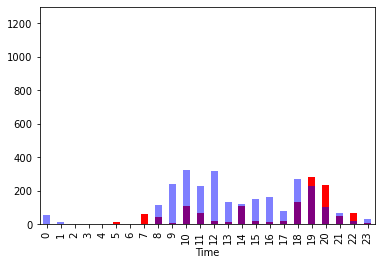

In [24]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 1300])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)


In [25]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

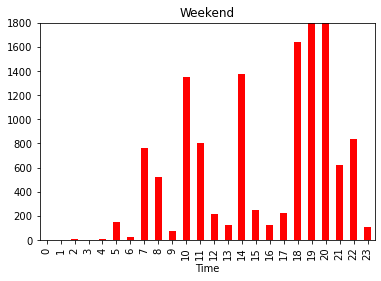

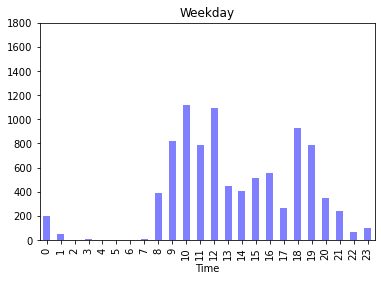

In [26]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [27]:
df['domain'].value_counts()[:50]

blackboard.umbc.edu                 583
webauth.umbc.edu                    417
www.google.com                      374
mail.google.com                     220
accounts.google.com                 148
www.amazon.com                      134
www.youtube.com                     131
umbc-csm.symplicity.com             124
my.umbc.edu                         108
localhost:8888                      101
my3.my.umbc.edu                      62
www.southwest.com                    53
www.tesla.com                        48
localhost:8889                       42
umbc.webex.com                       40
accounts.youtube.com                 39
us.bbcollab.com                      37
umbcstudents-md.safecolleges.com     36
github.com                           36
csprd-web.ps.umbc.edu                31
copyleaks.com                        31
vimeo.com                            28
www.linkedin.com                     26
lucid.app                            26
www.walmart.com                      25


In [28]:
df['domain'] = df['domain'].astype(str)

In [29]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

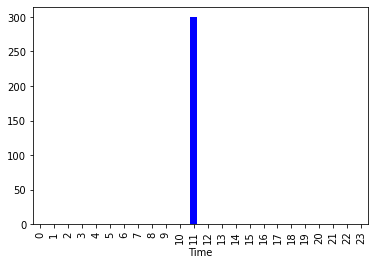

In [30]:
_= show_domain_stats('facebook', 'blue')

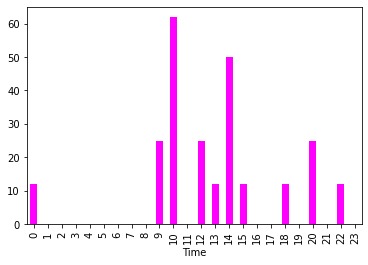

In [31]:
_ = show_domain_stats('stackover', 'magenta')

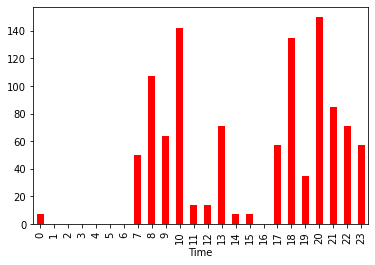

In [32]:
_ = show_domain_stats('localhost', 'red')

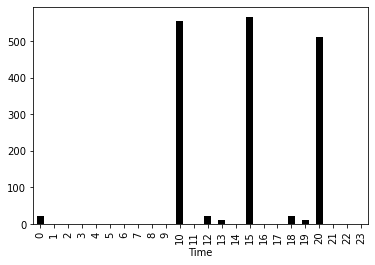

In [33]:
_=show_domain_stats('amazon', 'black')

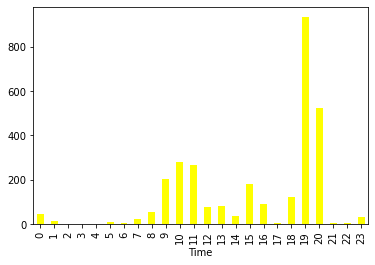

In [34]:
_=show_domain_stats('blackboard', 'yellow')

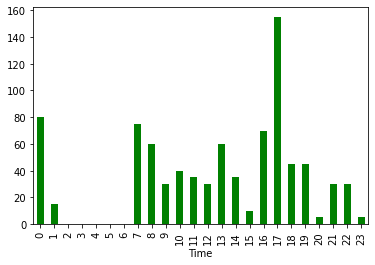

In [35]:
_=show_domain_stats('youtube', 'green')

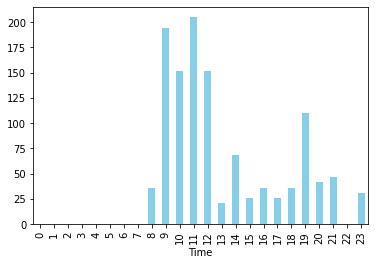

In [36]:
_=show_domain_stats('mail', 'skyblue')

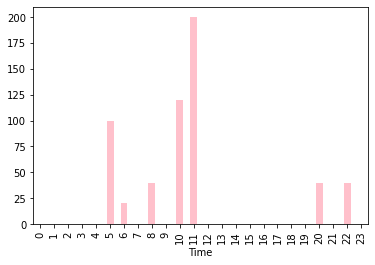

In [37]:
_=show_domain_stats('vimeo', 'pink')

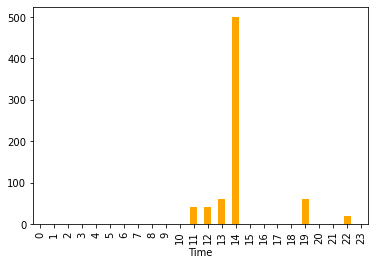

In [38]:
_=show_domain_stats('github', 'orange')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1.This is a personal computer as he watches youtube videos throughout the day.

2.He is not employed as he browses internet in the day time. He is a student as he visits UMBC website, uses blackboard, localhost for using jupyter, visits websites for python learning such as stackover.

3.His interests are watching youtube, learning python, shopping.

4.He is doing a video-making project because he uses Vimeo, a video-making site, mostly in his free time. Also, He is an Indian as he browsed different Indian websites such as "Pantaloons", "amazon.in"  etc. Besides, he visits Dell, HP, Samsung, Apple websites. It seems like he is looking for buying any electronic products. 

### Do you give permission for another student to analyze your `history_cleaned.csv`? 

(Your name will stay confidencial)

Yes

### What do you think about this assignment? ( 3 sentences at most! ) 

answer here

This was an interesting HW and I learned how to clean and analyze data. 